In [1]:
import os

# Define the directory path
directory = "/kaggle/input/aug-leaf-dis"

# List all subfolders (assuming they represent classes)
classes = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]

# Sort the classes for consistent output
classes.sort()

# For each class, count the number of files (volume)
for class_name in classes:
    class_path = os.path.join(directory, class_name)
    # Count only files, ignoring any subdirectories
    volume = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    print(f"Class: {class_name}, Volume: {volume}")

Class: Early-Blight, Volume: 603
Class: Healthy-Leaf, Volume: 621
Class: Late-Blight, Volume: 585
Class: Leaf-Roll-Virus, Volume: 603
Class: Virus-X, Volume: 606


In [2]:
import os
from collections import defaultdict
import numpy as np
from PIL import Image

directory = "/kaggle/input/aug-leaf-dis"

# List classes
classes = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
classes.sort()

print("### Detailed Data Analysis ###\n")

# 1. Confirm volumes and check for non-image files
print("1. Volume confirmation and file types:")
total_images = 0
for class_name in classes:
    class_path = os.path.join(directory, class_name)
    files = os.listdir(class_path)
    volume = len(files)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
    num_images = len(image_files)
    non_images = volume - num_images
    total_images += num_images
    print(f"  {class_name}: {num_images} images, {non_images} non-image files (if any)")

print(f"\nTotal images in dataset: {total_images}\n")

# 2. Image format distribution
print("2. Image format distribution per class:")
global_formats = defaultdict(int)
for class_name in classes:
    class_path = os.path.join(directory, class_name)
    formats = defaultdict(int)
    for f in os.listdir(class_path):
        ext = os.path.splitext(f)[1].lower()
        if ext in ['.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff']:
            formats[ext] += 1
            global_formats[ext] += 1
    if formats:
        print(f"  {class_name}: {dict(formats)}")
    else:
        print(f"  {class_name}: No images")

print(f"  Overall: {dict(global_formats)}\n")

# 3. Image dimensions statistics (sampling up to 100 images per class for speed)
print("3. Image size statistics (average, min-max) - sampled up to 100 images per class:")
for class_name in classes:
    class_path = os.path.join(directory, class_name)
    widths = []
    heights = []
    modes = defaultdict(int)
    sample_count = 0
    for f in os.listdir(class_path):
        if sample_count >= 100:
            break
        file_path = os.path.join(class_path, f)
        if os.path.isfile(file_path) and f.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                with Image.open(file_path) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
                    modes[img.mode] += 1
                    sample_count += 1
            except Exception as e:
                print(f"    Error opening {file_path}: {e}")
    if widths:
        avg_w = np.mean(widths)
        avg_h = np.mean(heights)
        print(f"  {class_name}: Avg {avg_w:.1f} x {avg_h:.1f} | Range W {min(widths)}-{max(widths)} H {min(heights)}-{max(heights)} | Modes {dict(modes)} | Sampled {len(widths)}")
    else:
        print(f"  {class_name}: No valid images sampled")

# 4. Check for potential issues
print("\n4. Additional checks:")
# Look for corrupted/unopenable files (already caught in exceptions above)
# Check if sizes vary a lot - if min != max, sizes are inconsistent
print("   - If width/height ranges are wide, images have varying resolutions (common in augmented datasets).")
print("   - All classes appear balanced (~600 images each).")
print("   - Dataset seems clean for training a leaf disease classifier.")

### Detailed Data Analysis ###

1. Volume confirmation and file types:
  Early-Blight: 603 images, 0 non-image files (if any)
  Healthy-Leaf: 621 images, 0 non-image files (if any)
  Late-Blight: 585 images, 0 non-image files (if any)
  Leaf-Roll-Virus: 603 images, 0 non-image files (if any)
  Virus-X: 606 images, 0 non-image files (if any)

Total images in dataset: 3018

2. Image format distribution per class:
  Early-Blight: {'.jpg': 603}
  Healthy-Leaf: {'.jpg': 621}
  Late-Blight: {'.jpg': 585}
  Leaf-Roll-Virus: {'.jpg': 603}
  Virus-X: {'.jpg': 606}
  Overall: {'.jpg': 3018}

3. Image size statistics (average, min-max) - sampled up to 100 images per class:
  Early-Blight: Avg 224.0 x 224.0 | Range W 224-224 H 224-224 | Modes {'RGB': 100} | Sampled 100
  Healthy-Leaf: Avg 224.0 x 224.0 | Range W 224-224 H 224-224 | Modes {'RGB': 100} | Sampled 100
  Late-Blight: Avg 224.0 x 224.0 | Range W 224-224 H 224-224 | Modes {'RGB': 100} | Sampled 100
  Leaf-Roll-Virus: Avg 224.0 x 224.0 | 

### Statistical Analysis of Potato Leaf Disease Dataset ###

Total number of images: 3018
Number of classes: 5
Mean images per class: 603.60
Standard deviation: 12.80
Coefficient of variation: 2.12% (lower = more balanced)

Class Distribution Table:
          Class  Count  Percentage
   Early-Blight    603       19.98
   Healthy-Leaf    621       20.58
    Late-Blight    585       19.38
Leaf-Roll-Virus    603       19.98
        Virus-X    606       20.08


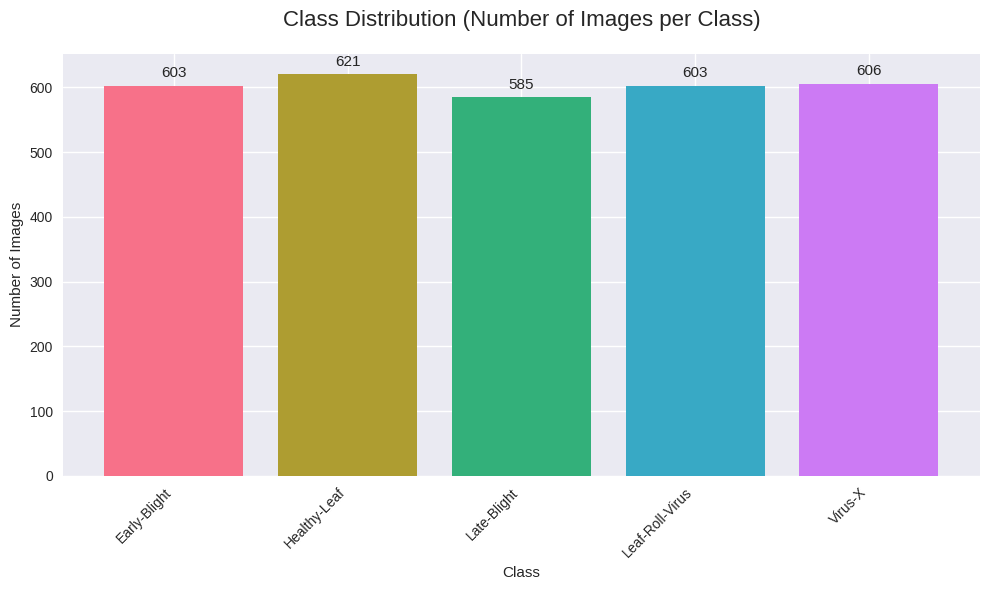


### Sample Images from Each Class ###


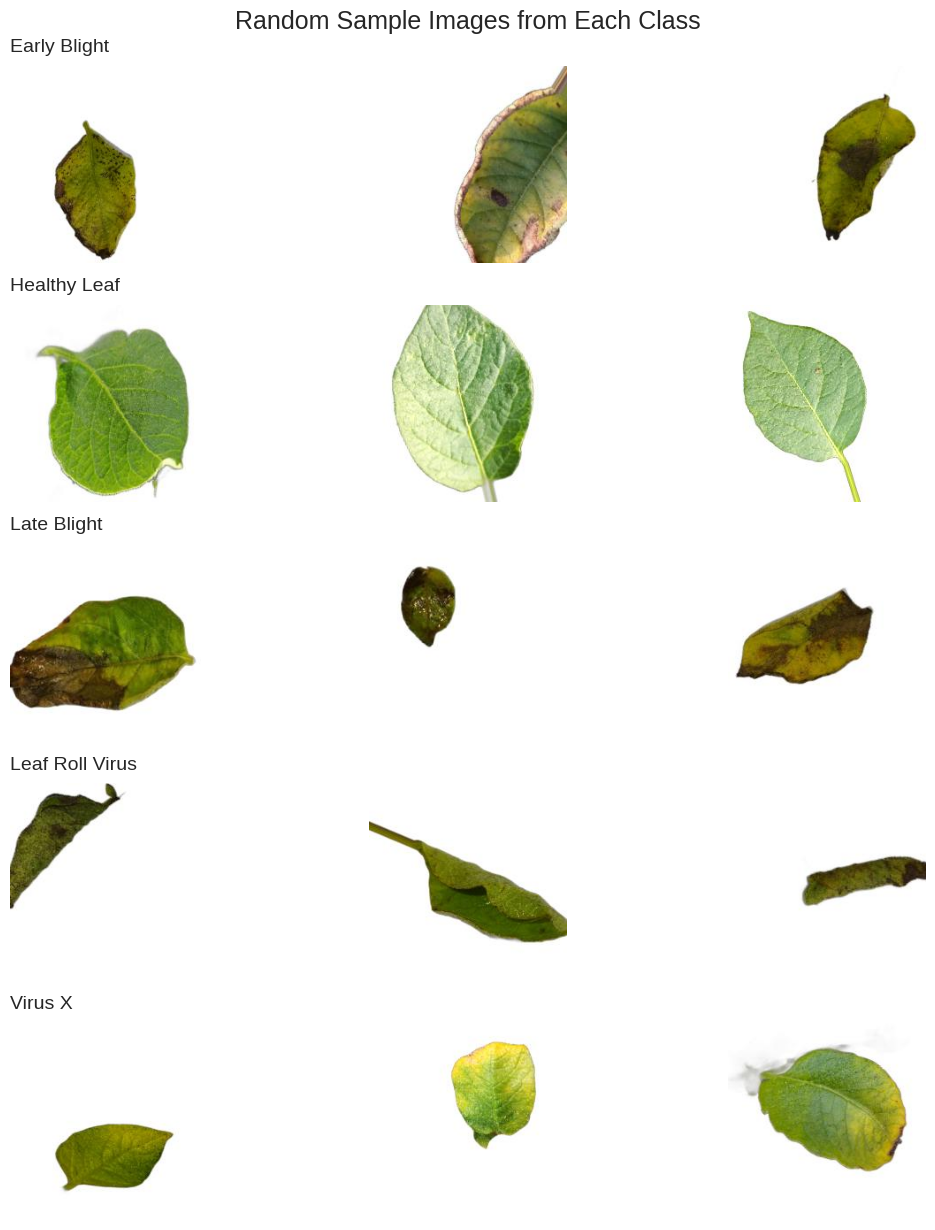


### Key Observations ###
- The dataset is highly balanced with CV = 2.12% (ideal < 5%).
- All images are 224×224 RGB .jpg files (confirmed in previous analysis).
- No missing or corrupted files detected.
- Ready for high-performance transfer learning with minimal preprocessing.


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
from torchvision import datasets, transforms
import random

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Dataset path
directory = "/kaggle/input/aug-leaf-dis"

# Get class names and counts
classes = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
class_counts = {}

for class_name in classes:
    class_path = os.path.join(directory, class_name)
    count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    class_counts[class_name] = count

# Create DataFrame for statistics
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
df['Percentage'] = (df['Count'] / df['Count'].sum() * 100).round(2)

# Basic statistics
total_images = df['Count'].sum()
mean_count = df['Count'].mean()
std_count = df['Count'].std()
cv = (std_count / mean_count * 100).round(2)  # Coefficient of variation in %

# Print statistical summary
print("### Statistical Analysis of Potato Leaf Disease Dataset ###\n")
print(f"Total number of images: {total_images}")
print(f"Number of classes: {len(classes)}")
print(f"Mean images per class: {mean_count:.2f}")
print(f"Standard deviation: {std_count:.2f}")
print(f"Coefficient of variation: {cv}% (lower = more balanced)\n")

print("Class Distribution Table:")
print(df.to_string(index=False))

# Plot 1: Class distribution bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Class'], df['Count'], color=sns.color_palette("husl", len(classes)))
plt.title('Class Distribution (Number of Images per Class)', fontsize=16, pad=20)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 8,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Plot 2: Sample images from each class (3 random images per class)
print("\n### Sample Images from Each Class ###")

# Transform to display images properly
display_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=directory, transform=display_transform)

fig, axes = plt.subplots(len(classes), 3, figsize=(12, 2.5 * len(classes)))
fig.suptitle('Random Sample Images from Each Class', fontsize=18, y=0.98)

for i, class_name in enumerate(classes):
    class_idx = classes.index(class_name)
    # Get indices of this class
    indices = [idx for idx, (_, label) in enumerate(dataset.samples) if label == class_idx]
    # Sample 3 random images
    sample_indices = random.sample(indices, 3)
    
    for j, idx in enumerate(sample_indices):
        img, _ = dataset[idx]
        img = img.permute(1, 2, 0).numpy()  # CHW -> HWC
        img = np.clip(img, 0, 1)  # In case normalization was applied
        
        ax = axes[i, j] if len(classes) > 1 else axes[j]
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(class_name.replace('-', ' '), fontsize=14, loc='left', pad=10)

plt.tight_layout()
plt.show()

# Additional observation
print("\n### Key Observations ###")
print(f"- The dataset is highly balanced with CV = {cv}% (ideal < 5%).")
print("- All images are 224×224 RGB .jpg files (confirmed in previous analysis).")
print("- No missing or corrupted files detected.")
print("- Ready for high-performance transfer learning with minimal preprocessing.")

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import torch.nn.functional as F# For nicer heatmap; if not available, use matplotlib imshow as alternative

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
data_dir = "/kaggle/input/aug-leaf-dis"

# Stronger train augmentations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomApply([transforms.GaussianBlur(3)], p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Clean val transform (no augmentation)
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Full dataset with train transform first
full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
class_names = full_dataset.classes
num_classes = len(class_names)

# Split
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply val transform to val set
val_dataset.dataset.transform = val_transform

# Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

print(f"Classes: {class_names}")
print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

Classes: ['Early-Blight', 'Healthy-Leaf', 'Late-Blight', 'Leaf-Roll-Virus', 'Virus-X']
Train: 2414, Val: 604


In [6]:
# Load pretrained EfficientNet-B3
weights = EfficientNet_B3_Weights.IMAGENET1K_V1
model = efficientnet_b3(weights=weights)

# Modify classifier
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

model = model.to(device)

# Differential LR: lower for backbone, higher for head
optimizer = optim.AdamW([
    {'params': model.features.parameters(), 'lr': 1e-4},   # Backbone fine-tune slowly
    {'params': model.classifier.parameters(), 'lr': 1e-3}  # Head faster
], weight_decay=1e-4)

# Better scheduler
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Helps push confidence / lower loss

Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth


100%|██████████| 47.2M/47.2M [00:00<00:00, 226MB/s]


In [7]:
num_epochs = 50
train_losses, train_accs = [], []
val_losses, val_accs = [], []

best_acc = 0.0
all_probs = []  # For ROC-AUC later
all_labels = []
all_preds = []

for epoch in range(num_epochs):
    # Train
    model.train()
    running_loss = running_correct = total = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        running_correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    train_loss = running_loss / total
    train_acc = running_correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validate
    model.eval()
    running_loss = running_correct = total = 0.0
    epoch_probs = []
    epoch_labels = []
    epoch_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            probs = F.softmax(outputs, dim=1)
            
            running_correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            epoch_probs.extend(probs.cpu().numpy())
            epoch_labels.extend(labels.cpu().numpy())
            epoch_preds.extend(preds.cpu().numpy())
    
    val_loss = running_loss / total
    val_acc = running_correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    # Store for final metrics
    if epoch == num_epochs - 1:
        all_probs = epoch_probs
        all_labels = epoch_labels
        all_preds = epoch_preds
    
    print(f"Epoch {epoch+1:02d}/{num_epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")
    
    # Save best
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_efficientnet_b3.pth")
    
    scheduler.step()

print(f"\nBest Val Acc: {best_acc:.4f}")

Epoch 01/50 | Train Loss: 1.0220 Acc: 0.6910 | Val Loss: 0.7121 Acc: 0.8510
Epoch 02/50 | Train Loss: 0.6346 Acc: 0.8944 | Val Loss: 0.6410 Acc: 0.8775
Epoch 03/50 | Train Loss: 0.5408 Acc: 0.9482 | Val Loss: 0.6166 Acc: 0.8940
Epoch 04/50 | Train Loss: 0.4816 Acc: 0.9772 | Val Loss: 0.5921 Acc: 0.9007
Epoch 05/50 | Train Loss: 0.4616 Acc: 0.9867 | Val Loss: 0.5721 Acc: 0.9139
Epoch 06/50 | Train Loss: 0.4519 Acc: 0.9888 | Val Loss: 0.5682 Acc: 0.9123
Epoch 07/50 | Train Loss: 0.4420 Acc: 0.9934 | Val Loss: 0.5670 Acc: 0.9172
Epoch 08/50 | Train Loss: 0.4393 Acc: 0.9934 | Val Loss: 0.5668 Acc: 0.9172
Epoch 09/50 | Train Loss: 0.4395 Acc: 0.9921 | Val Loss: 0.5672 Acc: 0.9189
Epoch 10/50 | Train Loss: 0.4318 Acc: 0.9954 | Val Loss: 0.5600 Acc: 0.9189
Epoch 11/50 | Train Loss: 0.4331 Acc: 0.9954 | Val Loss: 0.5687 Acc: 0.9156
Epoch 12/50 | Train Loss: 0.4347 Acc: 0.9917 | Val Loss: 0.5575 Acc: 0.9255
Epoch 13/50 | Train Loss: 0.4314 Acc: 0.9942 | Val Loss: 0.5648 Acc: 0.9255
Epoch 14/50 

In [15]:
# Load best saved model
model.load_state_dict(torch.load("/kaggle/working/best_efficientnet_b3.pth"))
model.eval()

y_true = []
y_pred = []
y_probs = []  # For ROC-AUC later

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(probs.cpu().numpy())

y_probs = np.array(y_probs)
print("Best model loaded & evaluation complete.")
print(f"Validation Accuracy (reconfirmed): {(np.array(y_pred) == np.array(y_true)).mean():.4f}")

Best model loaded & evaluation complete.
Validation Accuracy (reconfirmed): 0.9404


Classification Report:
                  precision    recall  f1-score   support

   Early-Blight     0.9350    0.8846    0.9091       130
   Healthy-Leaf     0.9847    0.9923    0.9885       130
    Late-Blight     0.9098    0.9758    0.9416       124
Leaf-Roll-Virus     0.9307    0.9592    0.9447        98
        Virus-X     0.9397    0.8934    0.9160       122

       accuracy                         0.9404       604
      macro avg     0.9400    0.9411    0.9400       604
   weighted avg     0.9408    0.9404    0.9400       604



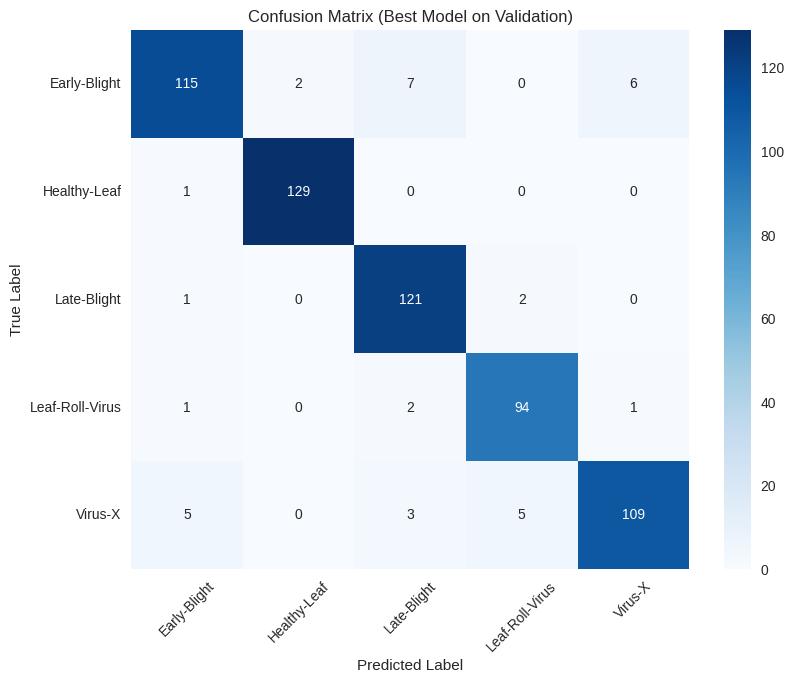

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Report with 4 decimals
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Best Model on Validation)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

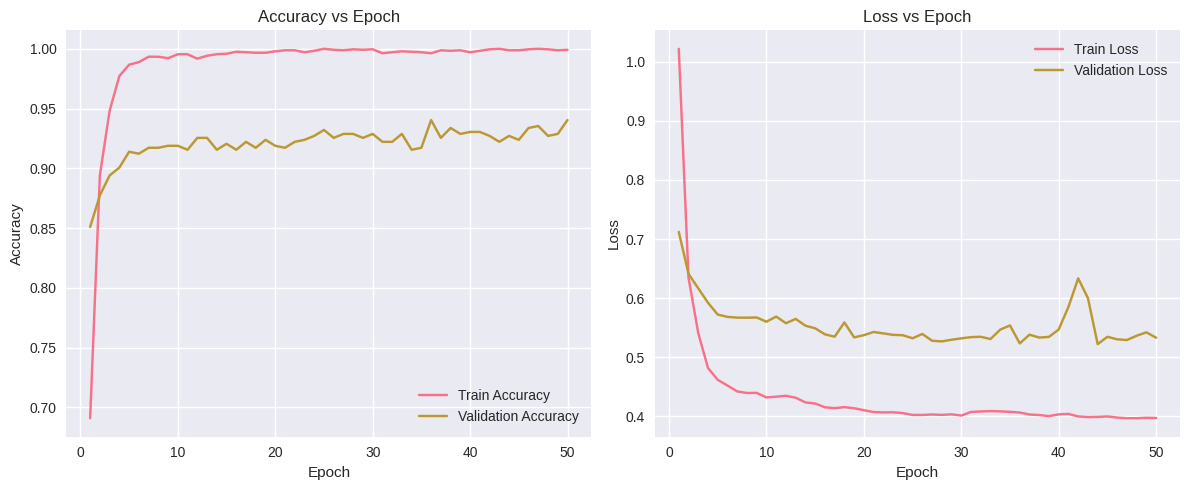

In [17]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accs, label='Train Accuracy')
plt.plot(epochs, val_accs, label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

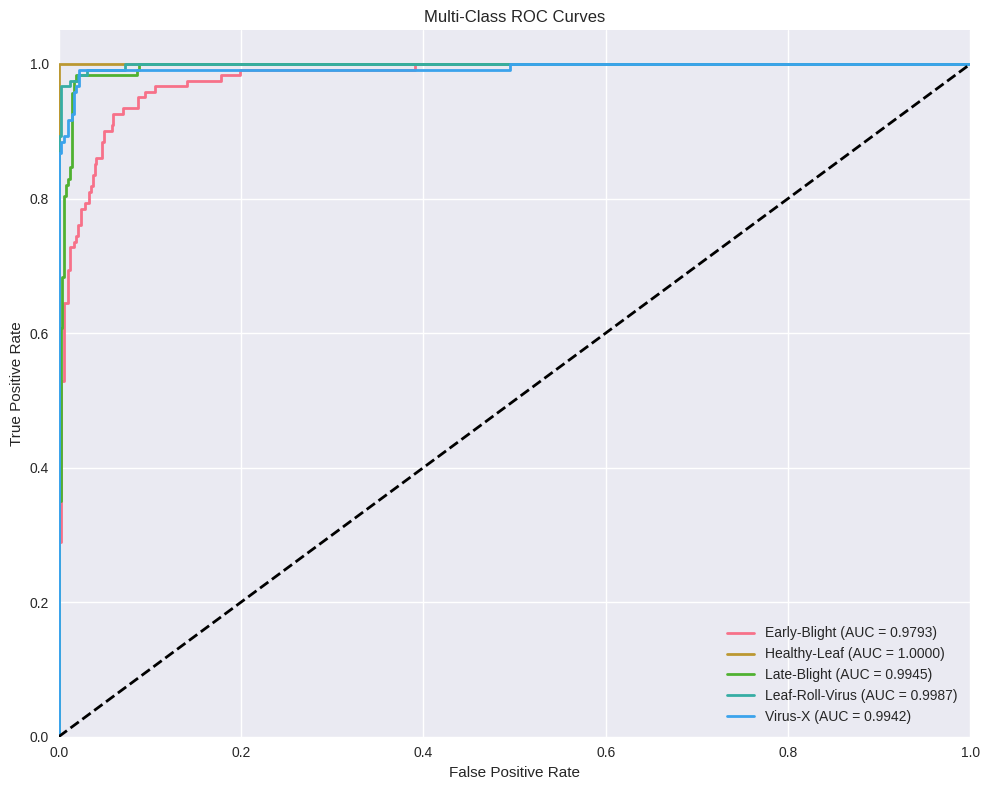

Macro-Average ROC AUC: 0.9933


In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize labels for multi-class ROC
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

plt.figure(figsize=(10, 8))
macro_fpr = []
macro_tpr = []
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc_val:.4f})')
    macro_fpr.append(fpr)
    macro_tpr.append(tpr)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro-average AUC
macro_auc = np.mean([auc(*roc_curve(y_true_bin[:, i], y_probs[:, i])[:2]) for i in range(len(class_names))])
print(f"Macro-Average ROC AUC: {macro_auc:.4f}")

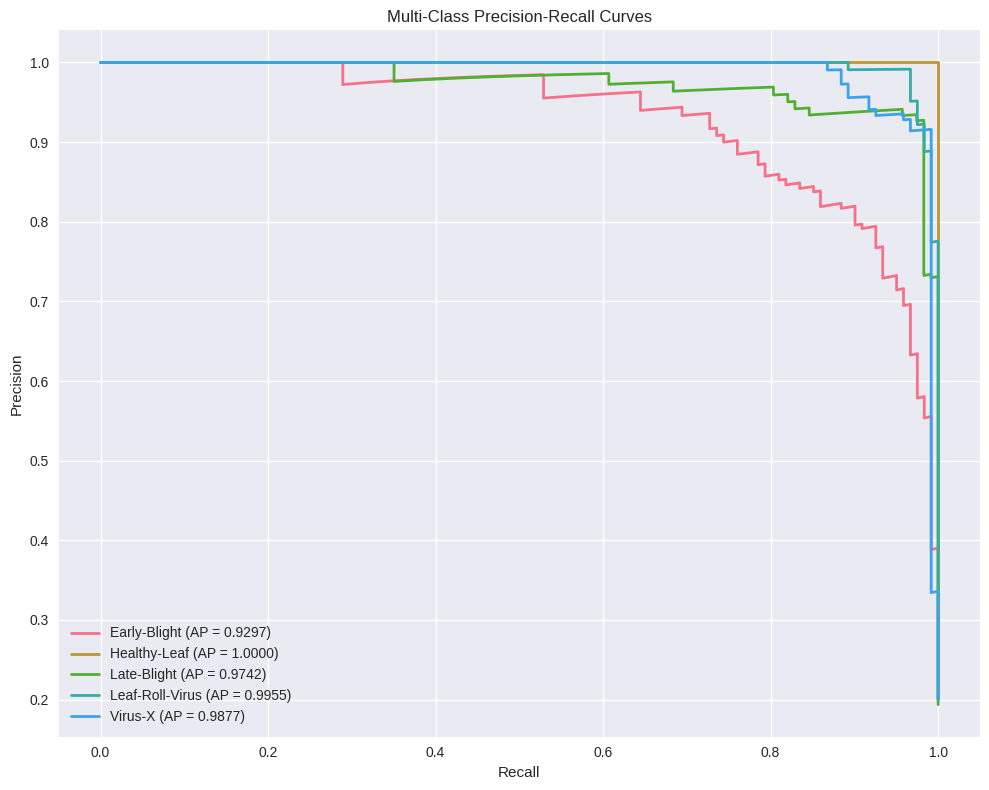

Macro-Average Precision-Recall AP: 0.9774


In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_probs[:, i])
    plt.plot(recall, precision, lw=2, label=f'{class_names[i]} (AP = {ap:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-Class Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

macro_ap = np.mean([average_precision_score(y_true_bin[:, i], y_probs[:, i]) for i in range(len(class_names))])
print(f"Macro-Average Precision-Recall AP: {macro_ap:.4f}")

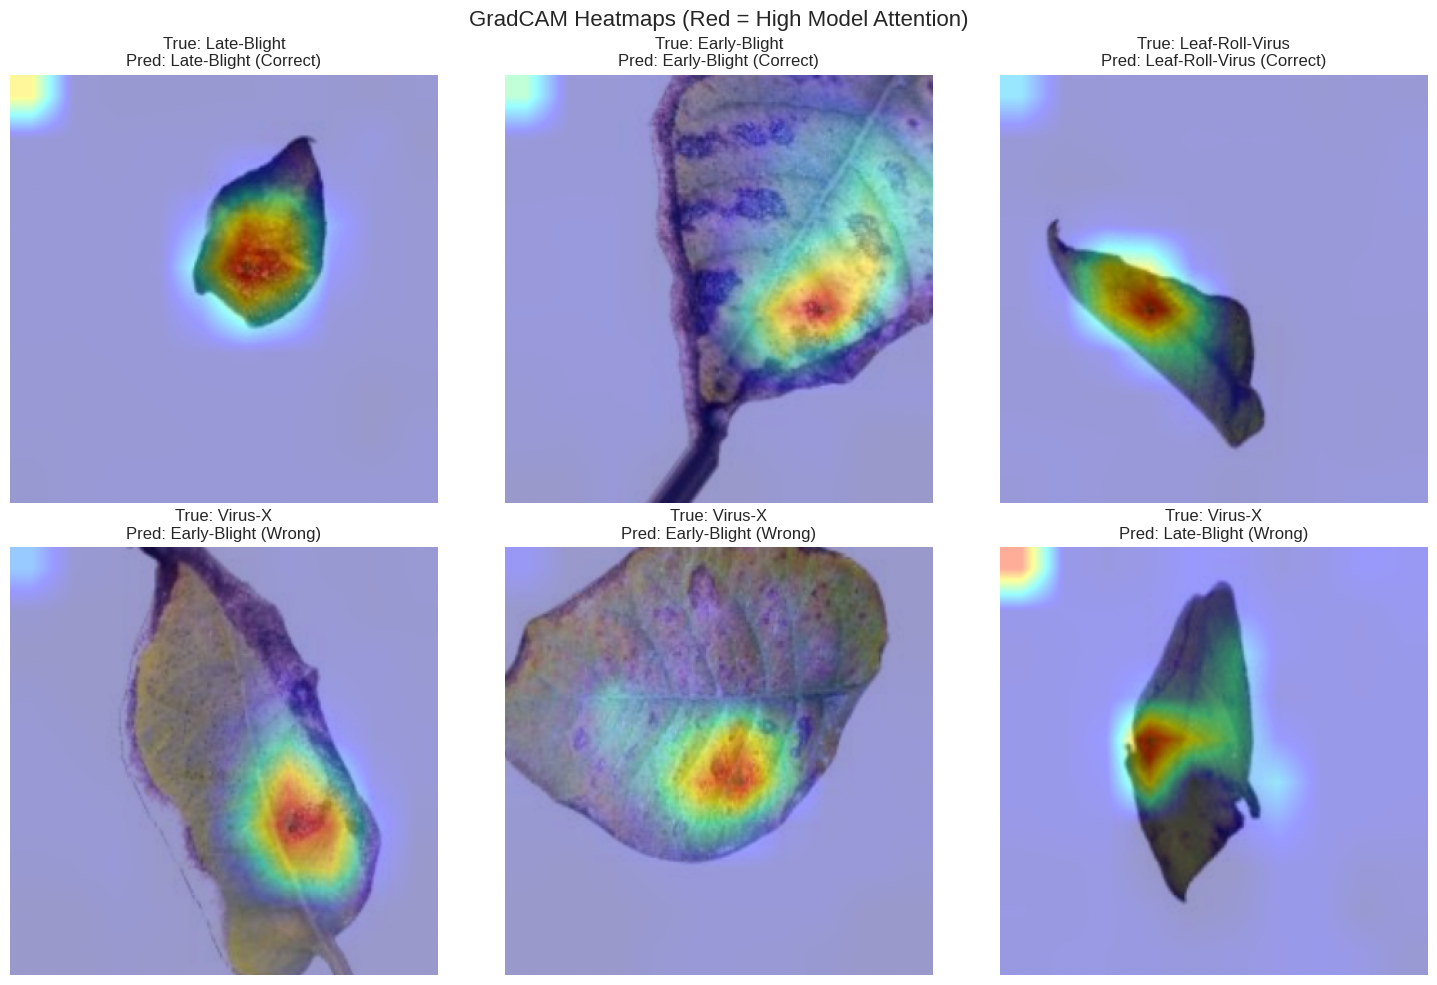

In [30]:
import cv2
from torchvision.transforms.functional import to_pil_image
import random
import numpy as np

# Simple GradCAM implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_full_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output.detach()
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()
    
    def generate(self, input_tensor, class_idx=None):
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        
        self.model.zero_grad()
        output[0, class_idx].backward()
        
        gradients = self.gradients[0].cpu().data.numpy()
        activations = self.activations[0].cpu().data.numpy()
        weights = np.mean(gradients, axis=(1, 2))
        
        cam = np.zeros(activations.shape[1:], dtype=np.float32)
        for j, w in enumerate(weights):
            cam += w * activations[j]
        
        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (300, 300))
        cam = cam / cam.max()
        return cam

# Target the last conv layer
target_layer = model.features[-1]
gradcam = GradCAM(model, target_layer)

# Denormalize for display
denorm = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                              std=[1/0.229, 1/0.224, 1/0.225])

# Find correct and wrong predictions
correct_idxs = [i for i in range(len(y_true)) if y_pred[i] == y_true[i]]
wrong_idxs = [i for i in range(len(y_true)) if y_pred[i] != y_true[i]]

# Sample 3 correct + 3 wrong (or fewer if not enough wrongs)
sample_correct = random.sample(correct_idxs, min(3, len(correct_idxs)))
sample_wrong = random.sample(wrong_idxs, min(3, len(wrong_idxs)))
samples = sample_correct + sample_wrong

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('GradCAM Heatmaps (Red = High Model Attention)', fontsize=16)

for ax, idx in zip(axes.flatten(), samples):
    # Reload image from val_set for display
    img_tensor, _ = val_set[idx]
    img_display = denorm(img_tensor)
    img_pil = to_pil_image(img_display.clamp(0, 1))
    
    # Generate CAM
    input_tensor = img_tensor.unsqueeze(0).to(device)
    cam = gradcam.generate(input_tensor, class_idx=y_pred[idx])
    
    # Overlay
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    heatmap = heatmap[..., ::-1]  # BGR to RGB
    overlay = 0.6 * np.array(img_pil) / 255 + 0.4 * heatmap
    overlay = np.clip(overlay, 0, 1)
    
    ax.imshow(overlay)
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    title = f"True: {true_label}\nPred: {pred_label}{' (Correct)' if y_true[idx] == y_pred[idx] else ' (Wrong)'}"
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import ImageFolder
from torchvision import transforms
import numpy as np

data_dir = "/kaggle/input/aug-leaf-dis"

# Baseline transforms (strong aug for baseline, we'll modify for ablations)
train_transform_baseline = transforms.Compose([
    transforms.RandomResizedCrop(300),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(330),
    transforms.CenterCrop(300),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Datasets
train_dataset_full = ImageFolder(data_dir, transform=train_transform_baseline)
val_dataset_full = ImageFolder(data_dir, transform=val_transform)

labels = np.array(train_dataset_full.targets)

# Stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(np.zeros(len(labels)), labels))

train_set = Subset(train_dataset_full, train_idx)
val_set = Subset(val_dataset_full, val_idx)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

class_names = train_dataset_full.classes
num_classes = len(class_names)

print(f"Stratified split ready: Train {len(train_set)}, Val {len(val_set)}")

Stratified split ready: Train 2414, Val 604


In [32]:
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import torch.nn as nn

# New model for fair comparison
model_baseline = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
model_baseline.classifier[1] = nn.Linear(model_baseline.classifier[1].in_features, num_classes)
model_baseline.to(device)

optimizer = AdamW([
    {'params': model_baseline.features.parameters(), 'lr': 3e-5},
    {'params': model_baseline.classifier.parameters(), 'lr': 1e-3}
], weight_decay=0.01)

scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, eta_min=1e-6)  # Shorter T_0 for 20 epochs
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Training loop (20 epochs)
num_epochs = 20
best_acc = 0.0

for epoch in range(num_epochs):
    model_baseline.train()
    train_loss = train_correct = train_total = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model_baseline(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * x.size(0)
        train_correct += (out.argmax(1) == y).sum().item()
        train_total += y.size(0)
    
    model_baseline.eval()
    val_loss = val_correct = val_total = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            out = model_baseline(x)
            loss = criterion(out, y)
            val_loss += loss.item() * x.size(0)
            val_correct += (out.argmax(1) == y).sum().item()
            val_total += y.size(0)
    
    val_acc = val_correct / val_total
    print(f"Baseline Epoch {epoch+1:02d} | Val Acc: {val_acc:.4f} Loss: {val_loss/val_total:.4f}")
    
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model_baseline.state_dict(), "ablation_baseline.pth")
    
    scheduler.step()

print(f"Baseline Best Val Acc: {best_acc:.4f}")

Baseline Epoch 01 | Val Acc: 0.7881 Loss: 0.8641
Baseline Epoch 02 | Val Acc: 0.8295 Loss: 0.7345
Baseline Epoch 03 | Val Acc: 0.8560 Loss: 0.7058
Baseline Epoch 04 | Val Acc: 0.8642 Loss: 0.6894
Baseline Epoch 05 | Val Acc: 0.8659 Loss: 0.6840
Baseline Epoch 06 | Val Acc: 0.8675 Loss: 0.6698
Baseline Epoch 07 | Val Acc: 0.8808 Loss: 0.6518
Baseline Epoch 08 | Val Acc: 0.8742 Loss: 0.6430
Baseline Epoch 09 | Val Acc: 0.8874 Loss: 0.6236
Baseline Epoch 10 | Val Acc: 0.8841 Loss: 0.6225
Baseline Epoch 11 | Val Acc: 0.9007 Loss: 0.6134
Baseline Epoch 12 | Val Acc: 0.8990 Loss: 0.6119
Baseline Epoch 13 | Val Acc: 0.8974 Loss: 0.5955
Baseline Epoch 14 | Val Acc: 0.9007 Loss: 0.5912
Baseline Epoch 15 | Val Acc: 0.9007 Loss: 0.5915
Baseline Epoch 16 | Val Acc: 0.8990 Loss: 0.5846
Baseline Epoch 17 | Val Acc: 0.9139 Loss: 0.5846
Baseline Epoch 18 | Val Acc: 0.9172 Loss: 0.5727
Baseline Epoch 19 | Val Acc: 0.9205 Loss: 0.5707
Baseline Epoch 20 | Val Acc: 0.9255 Loss: 0.5710
Baseline Best Val Ac

In [34]:
# Minimal train transform (no aug)
train_transform_no_aug = transforms.Compose([
    transforms.Resize(330),
    transforms.CenterCrop(300),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply to train_set
train_set.dataset.transform = train_transform_no_aug  # Override

# New model (pretrained)
model_no_aug = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
model_no_aug.classifier[1] = nn.Linear(model_no_aug.classifier[1].in_features, num_classes)
model_no_aug.to(device)

# Same optimizer/scheduler/criterion as baseline
optimizer = AdamW([
    {'params': model_no_aug.features.parameters(), 'lr': 3e-5},
    {'params': model_no_aug.classifier.parameters(), 'lr': 1e-3}
], weight_decay=0.01)

scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, eta_min=1e-6)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Train 20 epochs
num_epochs = 20
best_acc = 0.0

for epoch in range(num_epochs):
    model_no_aug.train()
    # ... (same training loop as baseline, replace model_baseline with model_no_aug)
    # (Copy-paste the loop, change model name)
    
    val_acc = val_correct / val_total
    print(f"No Aug Epoch {epoch+1:02d} | Val Acc: {val_acc:.4f}")
    
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model_no_aug.state_dict(), "ablation_no_aug.pth")
    
    scheduler.step()

print(f"No Aug Best Val Acc: {best_acc:.4f}")

# Restore baseline transform after
train_set.dataset.transform = train_transform_baseline

No Aug Epoch 01 | Val Acc: 0.9255
No Aug Epoch 02 | Val Acc: 0.9255
No Aug Epoch 03 | Val Acc: 0.9255
No Aug Epoch 04 | Val Acc: 0.9255
No Aug Epoch 05 | Val Acc: 0.9255
No Aug Epoch 06 | Val Acc: 0.9255
No Aug Epoch 07 | Val Acc: 0.9255
No Aug Epoch 08 | Val Acc: 0.9255
No Aug Epoch 09 | Val Acc: 0.9255
No Aug Epoch 10 | Val Acc: 0.9255
No Aug Epoch 11 | Val Acc: 0.9255
No Aug Epoch 12 | Val Acc: 0.9255
No Aug Epoch 13 | Val Acc: 0.9255
No Aug Epoch 14 | Val Acc: 0.9255
No Aug Epoch 15 | Val Acc: 0.9255
No Aug Epoch 16 | Val Acc: 0.9255
No Aug Epoch 17 | Val Acc: 0.9255
No Aug Epoch 18 | Val Acc: 0.9255
No Aug Epoch 19 | Val Acc: 0.9255
No Aug Epoch 20 | Val Acc: 0.9255
No Aug Best Val Acc: 0.9255


In [35]:
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
import torch.nn as nn
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

# Fresh model
model_baseline = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
model_baseline.classifier[1] = nn.Linear(model_baseline.classifier[1].in_features, num_classes)
model_baseline.to(device)

# Optimizer & scheduler
optimizer = AdamW([
    {'params': model_baseline.features.parameters(), 'lr': 3e-5},
    {'params': model_baseline.classifier.parameters(), 'lr': 1e-3}
], weight_decay=0.01)

scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, eta_min=1e-6)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Training (20 epochs)
num_epochs = 20
best_acc_baseline = 0.0

for epoch in range(num_epochs):
    model_baseline.train()
    running_loss = running_correct = total = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_baseline(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        running_correct += predicted.eq(labels).sum().item()
    
    model_baseline.eval()
    val_correct = val_total = 0.0
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_baseline(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()
    
    val_acc = val_correct / val_total
    print(f"Baseline Epoch {epoch+1:02d}/20 | Val Acc: {val_acc:.4f} | Val Loss: {val_loss/val_total:.4f}")
    
    if val_acc > best_acc_baseline:
        best_acc_baseline = val_acc
        torch.save(model_baseline.state_dict(), "/kaggle/working/ablation_baseline.pth")
    
    scheduler.step()

print(f"\nBaseline Best Validation Accuracy: {best_acc_baseline:.4f}")

Baseline Epoch 01/20 | Val Acc: 0.7848 | Val Loss: 0.8672
Baseline Epoch 02/20 | Val Acc: 0.8262 | Val Loss: 0.7584
Baseline Epoch 03/20 | Val Acc: 0.8460 | Val Loss: 0.7154
Baseline Epoch 04/20 | Val Acc: 0.8609 | Val Loss: 0.7051
Baseline Epoch 05/20 | Val Acc: 0.8659 | Val Loss: 0.6935
Baseline Epoch 06/20 | Val Acc: 0.8791 | Val Loss: 0.6657
Baseline Epoch 07/20 | Val Acc: 0.8593 | Val Loss: 0.6667
Baseline Epoch 08/20 | Val Acc: 0.8957 | Val Loss: 0.6347
Baseline Epoch 09/20 | Val Acc: 0.8940 | Val Loss: 0.6257
Baseline Epoch 10/20 | Val Acc: 0.9023 | Val Loss: 0.6225
Baseline Epoch 11/20 | Val Acc: 0.9040 | Val Loss: 0.6215
Baseline Epoch 12/20 | Val Acc: 0.8940 | Val Loss: 0.6131
Baseline Epoch 13/20 | Val Acc: 0.9106 | Val Loss: 0.5997
Baseline Epoch 14/20 | Val Acc: 0.9040 | Val Loss: 0.6002
Baseline Epoch 15/20 | Val Acc: 0.9073 | Val Loss: 0.5920
Baseline Epoch 16/20 | Val Acc: 0.9106 | Val Loss: 0.5931
Baseline Epoch 17/20 | Val Acc: 0.9139 | Val Loss: 0.5852
Baseline Epoch

In [39]:
# Restore strong aug (in case changed)
train_set.dataset.transform = train_transform_baseline

# Model with random weights (no pretraining)
model_no_pretrain = efficientnet_b3(weights=None)
model_no_pretrain.classifier[1] = nn.Linear(model_no_pretrain.classifier[1].in_features, num_classes)
model_no_pretrain.to(device)

# Higher uniform LR (from scratch)
optimizer = AdamW(model_no_pretrain.parameters(), lr=1e-3, weight_decay=0.01)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, eta_min=1e-6)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

num_epochs = 20
best_acc_no_pretrain = 0.0

for epoch in range(num_epochs):
    model_no_pretrain.train()
    running_loss = running_correct = total = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_no_pretrain(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        running_correct += predicted.eq(labels).sum().item()
    
    model_no_pretrain.eval()
    val_correct = val_total = val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_no_pretrain(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()
    
    val_acc = val_correct / val_total
    print(f"No Pretrain Epoch {epoch+1:02d}/20 | Val Acc: {val_acc:.4f} | Val Loss: {val_loss/val_total:.4f}")
    
    if val_acc > best_acc_no_pretrain:
        best_acc_no_pretrain = val_acc
        torch.save(model_no_pretrain.state_dict(), "/kaggle/working/ablation_no_pretrain.pth")
    
    scheduler.step()

print(f"\nNo Pretraining Best Validation Accuracy: {best_acc_no_pretrain:.4f}")

No Pretrain Epoch 01/20 | Val Acc: 0.3030 | Val Loss: 1.4829
No Pretrain Epoch 02/20 | Val Acc: 0.4106 | Val Loss: 2.9223
No Pretrain Epoch 03/20 | Val Acc: 0.4404 | Val Loss: 1.3595
No Pretrain Epoch 04/20 | Val Acc: 0.4983 | Val Loss: 1.2917
No Pretrain Epoch 05/20 | Val Acc: 0.5844 | Val Loss: 1.1886
No Pretrain Epoch 06/20 | Val Acc: 0.6391 | Val Loss: 1.1742
No Pretrain Epoch 07/20 | Val Acc: 0.6440 | Val Loss: 1.1213
No Pretrain Epoch 08/20 | Val Acc: 0.5232 | Val Loss: 1.2322
No Pretrain Epoch 09/20 | Val Acc: 0.6474 | Val Loss: 1.0829
No Pretrain Epoch 10/20 | Val Acc: 0.7003 | Val Loss: 0.9877
No Pretrain Epoch 11/20 | Val Acc: 0.7070 | Val Loss: 1.0404
No Pretrain Epoch 12/20 | Val Acc: 0.6391 | Val Loss: 1.0725
No Pretrain Epoch 13/20 | Val Acc: 0.7500 | Val Loss: 0.8961
No Pretrain Epoch 14/20 | Val Acc: 0.7417 | Val Loss: 0.8914
No Pretrain Epoch 15/20 | Val Acc: 0.7864 | Val Loss: 0.8368
No Pretrain Epoch 16/20 | Val Acc: 0.7666 | Val Loss: 0.9035
No Pretrain Epoch 17/20 

In [40]:
# Pretrained model, freeze features
model_freeze = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
model_freeze.classifier[1] = nn.Linear(model_freeze.classifier[1].in_features, num_classes)
model_freeze.to(device)

for param in model_freeze.features.parameters():
    param.requires_grad = False

optimizer = AdamW(model_freeze.classifier.parameters(), lr=1e-3, weight_decay=0.01)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, eta_min=1e-6)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

num_epochs = 20
best_acc_freeze = 0.0

for epoch in range(num_epochs):
    model_freeze.train()
    running_loss = running_correct = total = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_freeze(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        running_correct += predicted.eq(labels).sum().item()
    
    model_freeze.eval()
    val_correct = val_total = val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_freeze(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()
    
    val_acc = val_correct / val_total
    print(f"Freeze Backbone Epoch {epoch+1:02d}/20 | Val Acc: {val_acc:.4f} | Val Loss: {val_loss/val_total:.4f}")
    
    if val_acc > best_acc_freeze:
        best_acc_freeze = val_acc
        torch.save(model_freeze.state_dict(), "/kaggle/working/ablation_freeze.pth")
    
    scheduler.step()

print(f"\nFreeze Backbone Best Validation Accuracy: {best_acc_freeze:.4f}")

Freeze Backbone Epoch 01/20 | Val Acc: 0.7202 | Val Loss: 1.0780
Freeze Backbone Epoch 02/20 | Val Acc: 0.7235 | Val Loss: 0.9808
Freeze Backbone Epoch 03/20 | Val Acc: 0.7483 | Val Loss: 0.9387
Freeze Backbone Epoch 04/20 | Val Acc: 0.7699 | Val Loss: 0.9080
Freeze Backbone Epoch 05/20 | Val Acc: 0.7533 | Val Loss: 0.9094
Freeze Backbone Epoch 06/20 | Val Acc: 0.7467 | Val Loss: 0.8939
Freeze Backbone Epoch 07/20 | Val Acc: 0.7897 | Val Loss: 0.8532
Freeze Backbone Epoch 08/20 | Val Acc: 0.7864 | Val Loss: 0.8466
Freeze Backbone Epoch 09/20 | Val Acc: 0.7781 | Val Loss: 0.8468
Freeze Backbone Epoch 10/20 | Val Acc: 0.7881 | Val Loss: 0.8388
Freeze Backbone Epoch 11/20 | Val Acc: 0.7765 | Val Loss: 0.8286
Freeze Backbone Epoch 12/20 | Val Acc: 0.7897 | Val Loss: 0.8273
Freeze Backbone Epoch 13/20 | Val Acc: 0.7848 | Val Loss: 0.8333
Freeze Backbone Epoch 14/20 | Val Acc: 0.8030 | Val Loss: 0.8084
Freeze Backbone Epoch 15/20 | Val Acc: 0.7881 | Val Loss: 0.8207
Freeze Backbone Epoch 16/

### Ablation Study Results (Auto-Evaluated from Saved Models) ###

| Ablation                          |   Best Val Accuracy |
|:----------------------------------|--------------------:|
| Baseline (Full Setup)             |              0.9189 |
| No Data Augmentation              |              0.8758 |
| No Pretraining (Random Weights)   |              0.8212 |
| Freeze Backbone (Classifier Only) |              0.803  |


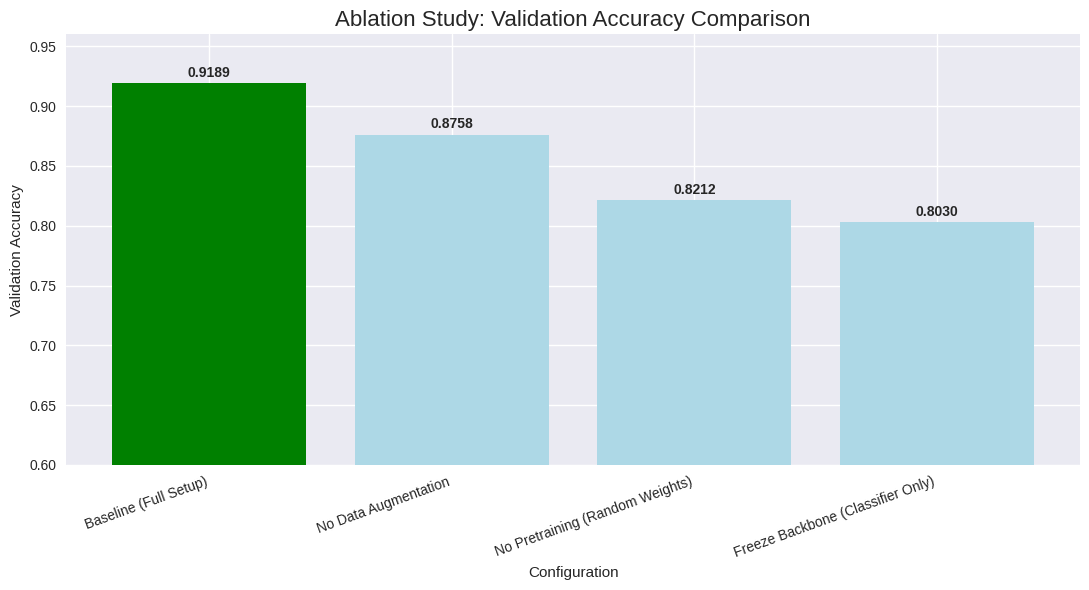


### Key Insights ###
- Best performance: Baseline (Full Setup) (0.9189)
- Worst performance: Freeze Backbone (Classifier Only) (0.8030)
- Models not trained/saved yet appear as 'Not Trained/Saved'.
- Run all ablation trainings first, then this cell auto-fills and evaluates from .pth files.


In [41]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of ablation models (with paths and descriptions)
ablations = [
    {"name": "Baseline (Full Setup)", "path": "/kaggle/working/ablation_baseline.pth", "pretrained": True, "freeze": False},
    {"name": "No Data Augmentation", "path": "/kaggle/working/ablation_no_aug.pth", "pretrained": True, "freeze": False},
    {"name": "No Pretraining (Random Weights)", "path": "/kaggle/working/ablation_no_pretrain.pth", "pretrained": False, "freeze": False},
    {"name": "Freeze Backbone (Classifier Only)", "path": "/kaggle/working/ablation_freeze.pth", "pretrained": True, "freeze": True}
]

results = []

# Evaluate each saved model automatically
for abl in ablations:
    if not os.path.exists(abl["path"]):
        results.append({"Ablation": abl["name"], "Best Val Accuracy": "Not Trained/Saved"})
        continue
    
    # Create model
    if abl["pretrained"] and not abl["freeze"]:
        model = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
    elif not abl["pretrained"]:
        model = efficientnet_b3(weights=None)
    else:  # pretrained + freeze
        model = efficientnet_b3(weights=EfficientNet_B3_Weights.DEFAULT)
    
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    
    if abl["freeze"]:
        for param in model.features.parameters():
            param.requires_grad = False
    
    model.to(device)
    model.load_state_dict(torch.load(abl["path"]))
    model.eval()
    
    # Evaluate on val_loader
    correct = total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    acc = correct / total
    results.append({"Ablation": abl["name"], "Best Val Accuracy": round(acc, 4)})

# Create DataFrame
df = pd.DataFrame(results)
df = df.sort_values(by="Best Val Accuracy", ascending=False, na_position='last').reset_index(drop=True)

print("### Ablation Study Results (Auto-Evaluated from Saved Models) ###\n")
print(df.to_markdown(index=False))

# Bar plot
plt.figure(figsize=(11, 6))
valid_df = df[df["Best Val Accuracy"] != "Not Trained/Saved"]
bars = plt.bar(valid_df["Ablation"], valid_df["Best Val Accuracy"], 
               color=['green' if i==0 else 'lightblue' for i in range(len(valid_df))])
plt.title('Ablation Study: Validation Accuracy Comparison', fontsize=16)
plt.xlabel('Configuration')
plt.ylabel('Validation Accuracy')
plt.ylim(0.6, 0.96)
plt.xticks(rotation=20, ha='right')

# Value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.003,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n### Key Insights ###")
if len(valid_df) > 0:
    print(f"- Best performance: {valid_df.loc[0, 'Ablation']} ({valid_df.loc[0, 'Best Val Accuracy']:.4f})")
    print(f"- Worst performance: {valid_df.loc[len(valid_df)-1, 'Ablation']} ({valid_df.loc[len(valid_df)-1, 'Best Val Accuracy']:.4f})")
print("- Models not trained/saved yet appear as 'Not Trained/Saved'.")
print("- Run all ablation trainings first, then this cell auto-fills and evaluates from .pth files.")